In [1]:
import numpy as np
# Import the Neuropixels Cache
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# We have all of this data on the datahub! This is where it lives.
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

# Create the EcephysProjectCache object
cache = EcephysProjectCache.fixed(manifest=manifest_path)

# Get the sessions available in this dataset
sessions = cache.get_session_table()
print('Total number of sessions: ' + str(len(sessions)))
sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [2]:
#we are looking at experiments performed on a specific genotype Pvalb
pvalb_sessions = sessions[sessions.full_genotype.str.match('Pvalb')]

pvalb_sessions

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
746083955,2019-10-03T00:00:00Z,726170935,brain_observatory_1.1,98.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,582,2216,6,"[VPM, TH, LGd, CA3, CA2, CA1, VISal, nan, grey..."
760345702,2019-10-03T00:00:00Z,739783171,brain_observatory_1.1,103.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,501,1862,5,"[MB, TH, PP, PIL, DG, CA3, CA1, VISal, nan, gr..."
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."
797828357,2019-10-03T00:00:00Z,776061251,brain_observatory_1.1,107.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,611,2232,6,"[PPT, MB, APN, NOT, HPF, ProS, CA1, VISam, nan..."
829720705,2019-10-03T00:00:00Z,811322619,functional_connectivity,112.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,529,1841,5,"[SCig, SCop, SCsg, SCzo, POST, VISp, nan, CA1,..."
839557629,2019-10-03T00:00:00Z,821469666,functional_connectivity,115.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,450,1853,5,"[APN, NOT, MB, DG, CA1, VISam, nan, VISpm, LGd..."
840012044,2019-10-03T00:00:00Z,820866121,functional_connectivity,116.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,758,2298,6,"[APN, DG, CA1, VISam, nan, LP, VISpm, VISp, LG..."


In [3]:
#selected one of the above sessions 
session = cache.get_session_data(pvalb_sessions.index.values[-3])
session.optogenetic_stimulation_epochs

,start_time,stop_time,condition,level,name,duration
id,,,,,,
0,9208.46044,9208.46544,a single square pulse,2.0,pulse,0.005
1,9210.64062,9210.65062,a single square pulse,1.7,pulse,0.010
2,9212.37064,9213.37064,2.5 ms pulses at 10 Hz,1.7,fast_pulses,1.000
3,9214.40076,9215.40076,2.5 ms pulses at 10 Hz,1.3,fast_pulses,1.000
4,9216.55091,9217.55091,2.5 ms pulses at 10 Hz,2.0,fast_pulses,1.000
...,...,...,...,...,...,...
295,9778.77516,9779.77516,2.5 ms pulses at 10 Hz,2.0,fast_pulses,1.000
296,9780.72530,9781.72530,half-period of a cosine wave,2.0,raised_cosine,1.000
297,9782.66528,9782.67028,a single square pulse,1.3,pulse,0.005


In [6]:
# we chose a stimulus condition (10 ms pulses) and a set of units in VISp, then created a DataArray containing binned spikes aligned to the start of each stimulus.
import xarray as xr
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISp')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da = optotagging_spike_counts(bin_edges, trials, units)



In [7]:
#We used this DataArray to plot the average firing rate for each unit in VISp as a function of time
import matplotlib.pyplot as plt
def plot_optotagging_response(da):

    plt.figure(figsize=(5,10))

    plt.imshow(da.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')
    plt.title('Average Firing Rate in VISp')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da)
plt.show()

<Figure size 500x1000 with 2 Axes>

In [8]:
#we searched for units in VISp that increase their firing rate during the 10 ms pulse
baseline = da.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate = baseline.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked = da.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate = evoked.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

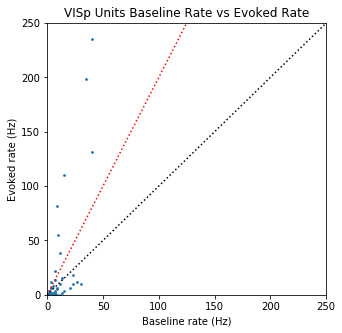

In [9]:
#We compared the baseline and evoked rates and saw a subset of units in VISp with a light-evoked increase in firing rate
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate, evoked_rate, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')
plt.title('VISp Units Baseline Rate vs Evoked Rate')
plt.show()

In [10]:
#select a threshold: 2x increase in firing rate (red line) to find PV+ insterneurons in VISp
cre_pos_units_visp = da.unit_id[(evoked_rate / (baseline_rate + 1)) > 2].values # add 1 to prevent divide-by-zero errors

cre_pos_units_visp

array([951132054, 951132138, 951132140, 951132159, 951132184, 951132212,
       951132205, 951132224, 951132236])

In [11]:
#create an empty column "cell_type" for visp units 
import pandas as pd
cre_pos_units_visp=list(cre_pos_units_visp)
df_visp_units=session.units[session.units.ecephys_structure_acronym.str.match('VISp')]
df_visp_units_index = df_visp_units.index.values.tolist()
df_visp_units['cell_type']=''
id = df_visp_units.index.values.tolist()


df_visp_units_rows = len(df_visp_units.axes[0])

#assign PV+/PV- to the cell type column 
for i in range(df_visp_units_rows):
    if id[i] in cre_pos_units_visp:
        df_visp_units.at[id [i],'cell_type']='PV+'
    else:
        df_visp_units.at[id [i],'cell_type']='PV-'

df_visp_units

,d_prime,snr,amplitude_cutoff,silhouette_score,firing_rate,waveform_recovery_slope,isolation_distance,nn_miss_rate,waveform_repolarization_slope,nn_hit_rate,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
951132060,3.709335,1.339945,0.058875,-0.184285,0.135443,-0.087921,34.232884,0.000868,0.374759,0.238095,...,VISp,8878,1458,7406,probeC,,29999.996238,1249.999843,True,PV-
951132054,8.846541,5.576810,0.000106,0.247093,19.803271,-0.434741,113.768259,0.000000,1.532069,1.000000,...,VISp,8878,1458,7406,probeC,,29999.996238,1249.999843,True,PV+
951132379,4.869646,2.475304,0.051656,0.090177,0.797653,-0.097016,46.306785,0.000874,0.515240,0.862745,...,VISp,8882,1441,7413,probeC,,29999.996238,1249.999843,True,PV-
951132066,5.939806,3.514646,0.007729,0.156889,3.692669,-0.104320,69.139376,0.000697,0.605123,0.992337,...,VISp,8887,1425,7420,probeC,,29999.996238,1249.999843,True,PV-
951132064,5.501095,4.070122,0.001215,0.145516,5.251063,-0.247455,81.222604,0.000220,1.057711,0.998667,...,VISp,8887,1425,7420,probeC,,29999.996238,1249.999843,True,PV-
951132062,4.566783,2.624338,0.005266,0.054991,1.661126,-0.041710,55.331983,0.000341,0.442715,0.939815,...,VISp,8885,1433,7416,probeC,,29999.996238,1249.999843,True,PV-
951132381,4.072421,2.801955,0.012368,0.125837,7.601707,-0.080542,116.822808,0.013547,0.325808,0.985333,...,VISp,8895,1392,7434,probeC,,29999.996238,1249.999843,True,PV-
951132070,6.091622,3.877735,0.007881,0.212822,7.401744,-0.112469,87.296818,0.000620,0.521940,0.985333,...,VISp,8895,1392,7434,probeC,,29999.996238,1249.999843,True,PV-
951132078,4.482259,2.790009,0.003946,0.177391,5.986996,-0.082885,94.088840,0.000381,0.441412,0.999333,...,VISp,8900,1376,7441,probeC,,29999.996238,1249.999843,True,PV-


In [25]:
#PV+/- neurons with their corresponding firing rate in VISp
df_visp_firing_rate = df_visp_units[['firing_rate','cell_type']]
df_visp_firing_rate

,firing_rate,cell_type
unit_id,,
951132060,0.135443,PV-
951132054,19.803271,PV+
951132379,0.797653,PV-
951132066,3.692669,PV-
951132064,5.251063,PV-
951132062,1.661126,PV-
951132381,7.601707,PV-
951132070,7.401744,PV-
951132078,5.986996,PV-


In [26]:
#we chose a set of units in VISl, then created a DataArray containing binned spikes aligned to the start of each stimulus.
import xarray as xr
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISl')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da = optotagging_spike_counts(bin_edges, trials, units)

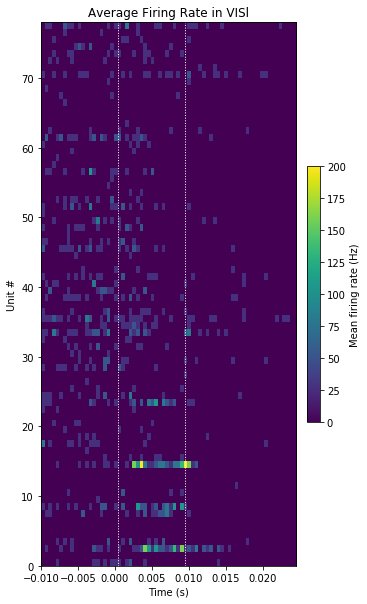

In [27]:
#We used this DataArray to plot the average firing rate for each unit in VISl as a function of time
import matplotlib.pyplot as plt
def plot_optotagging_response(da):

    plt.figure(figsize=(5,10))

    plt.imshow(da.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da)
plt.title('Average Firing Rate in VISl')
plt.show()

In [28]:
#we searched for units in VISl that increase their firing rate during the 10 ms pulse
baseline = da.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate = baseline.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked = da.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate = evoked.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

Text(0.5, 1.0, 'VISl Baseline Rate vs Evoked Rate')

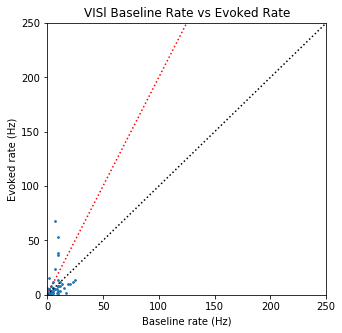

In [29]:
#We compared the baseline and evoked rates and saw a subset of units in VISl with a light-evoked increase in firing rate
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate, evoked_rate, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')

plt.title('VISl Baseline Rate vs Evoked Rate')

In [30]:
#select a threshold: 2x increase in firing rate (red line) to find PV+ insterneurons in VISl
cre_pos_units_visl = da.unit_id[(evoked_rate / (baseline_rate + 1)) > 2].values # add 1 to prevent divide-by-zero errors

cre_pos_units_visl

array([951133681, 951133822, 951133909, 951134030, 951134026, 951134066,
       951134100, 951134199])

In [33]:
#create an empty column "cell_type" for visp units 
import pandas as pd
df_visl_units=session.units[session.units.ecephys_structure_acronym.str.match('VISl')]
df_visl_units['cell_type']=''
cre_pos_units_visl=list(cre_pos_units_visl)
df_visl_units_index = df_visl_units.index.values.tolist()
id = df_visl_units.index.values.tolist()


df_visl_units_rows = len(df_visl_units.axes[0])

#assign PV+/PV- to the cell type column 
for i in range(df_visl_units_rows):
    if id[i] in cre_pos_units_visl:
        df_visl_units.at[id [i],'cell_type']='PV+'
    else:
        df_visl_units.at[id [i],'cell_type']='PV-'

df_visl_units

,d_prime,snr,amplitude_cutoff,silhouette_score,firing_rate,waveform_recovery_slope,isolation_distance,nn_miss_rate,waveform_repolarization_slope,nn_hit_rate,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
951133483,2.034903,1.951196,0.058766,0.155045,4.976194,-0.014423,55.070894,0.013627,0.216144,0.824667,...,VISl,8559,2190,9269,probeD,,29999.919281,1249.996637,True,PV-
951133481,5.387601,3.665567,0.000505,0.319389,2.479694,-0.008023,65.842782,0.000698,0.461057,0.957684,...,VISl,8559,2190,9269,probeD,,29999.919281,1249.996637,True,PV-
951133497,6.083560,2.375788,0.000242,0.173609,1.447664,-0.015754,89.007596,0.000138,0.140346,0.992821,...,VISl,8564,2178,9280,probeD,,29999.919281,1249.996637,True,PV-
951134615,2.716667,2.203166,0.050638,0.076944,2.799797,-0.022763,78.920911,0.006069,0.221172,0.948949,...,VISl,8561,2184,9274,probeD,,29999.919281,1249.996637,True,PV-
951133494,6.606682,5.437505,0.001769,0.225401,2.575225,-0.034779,82.757770,0.000765,0.648630,0.997549,...,VISl,8561,2184,9274,probeD,,29999.919281,1249.996637,True,PV-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951134112,10.150849,4.480799,0.000034,0.218501,0.754942,-0.158384,136.691468,0.000134,0.837586,0.995726,...,VISl,8717,1837,9640,probeD,,29999.919281,1249.996637,True,PV-
951134148,6.150383,4.439069,0.000196,0.315582,1.373540,-0.112436,86.707313,0.000102,0.797880,0.995614,...,VISl,8722,1825,9652,probeD,,29999.919281,1249.996637,True,PV-
951134199,3.485310,2.323548,0.057522,0.027825,10.107237,-0.058100,67.594431,0.041283,0.309462,0.862000,...,VISl,8734,1801,9677,probeD,,29999.919281,1249.996637,True,PV+


In [34]:
#PV+/- neurons with their corresponding firing rate in VISl
df_visl_firing_rate = df_visl_units[['firing_rate','cell_type']]
df_visl_firing_rate

,firing_rate,cell_type
unit_id,,
951133483,4.976194,PV-
951133481,2.479694,PV-
951133497,1.447664,PV-
951134615,2.799797,PV-
951133494,2.575225,PV-
...,...,...
951134112,0.754942,PV-
951134148,1.373540,PV-
951134199,10.107237,PV+


In [3]:
#a list with all the VISl sessions 

session_visl_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'VISl' in structure_list:
        session_visl_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_visl_list))+' sessions that meet this criteria:')
print(session_visl_list)

There are 42 sessions that meet this criteria:
[715093703, 719161530, 721123822, 732592105, 737581020, 739448407, 742951821, 743475441, 744228101, 746083955, 750332458, 750749662, 751348571, 754312389, 755434585, 756029989, 757216464, 760345702, 762120172, 763673393, 766640955, 768515987, 774875821, 778240327, 778998620, 789848216, 791319847, 794812542, 797828357, 798911424, 799864342, 816200189, 819186360, 819701982, 821695405, 829720705, 831882777, 835479236, 839068429, 839557629, 840012044, 847657808]


In [4]:
# a list with all the VISp sessions 
session_visp_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'VISp' in structure_list:
        session_visp_list.append(sessions.index[idx])   
        
print('There are '+str(len(session_visp_list))+' sessions that meet this criteria:')
print(session_visp_list)

There are 56 sessions that meet this criteria:
[715093703, 719161530, 721123822, 732592105, 737581020, 739448407, 742951821, 743475441, 744228101, 746083955, 750332458, 750749662, 751348571, 754312389, 754829445, 755434585, 756029989, 757216464, 757970808, 758798717, 759883607, 760345702, 760693773, 761418226, 762120172, 762602078, 763673393, 766640955, 767871931, 768515987, 771160300, 771990200, 773418906, 774875821, 778240327, 778998620, 779839471, 781842082, 786091066, 787025148, 789848216, 791319847, 793224716, 794812542, 797828357, 798911424, 799864342, 816200189, 821695405, 829720705, 831882777, 835479236, 839068429, 839557629, 840012044, 847657808]


In [5]:
# the first session in the VISp list 
session = cache.get_session_data(session_visp_list[0])

In [6]:
# names of all the stimuli 
session.stimulus_names

['spontaneous',
 'gabors',
 'flashes',
 'drifting_gratings',
 'natural_movie_three',
 'natural_movie_one',
 'static_gratings',
 'natural_scenes']

In [7]:
# all the sessions in VISp with the stimulus flash 
session.get_stimulus_table(['flashes'])

,color,contrast,orientation,phase,pos,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,
3647,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1274.523973,1,flashes,1274.774189,0.250216,244
3648,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1276.525623,1,flashes,1276.775842,0.250219,244
3649,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1278.527343,1,flashes,1278.777552,0.250209,245
3650,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1280.529013,1,flashes,1280.779222,0.250209,244
3651,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1282.530723,1,flashes,1282.780924,0.250201,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1564.766513,1,flashes,1565.016712,0.250199,245
3793,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1566.768143,1,flashes,1567.018352,0.250209,244
3794,-1,0.8,0,"[0.0, 0.0]","[0.0, 0.0]","[300.0, 300.0]","[0.0, 0.0]",1568.769833,1,flashes,1569.020042,0.250209,244


In [8]:
#peristimulus time histograms of VISp 
presentations = session.get_stimulus_table("flashes")
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords

/opt/conda/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1086: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.095 ... 0.495
  * unit_id                          (unit_id) int64 950930145 ... 950933960

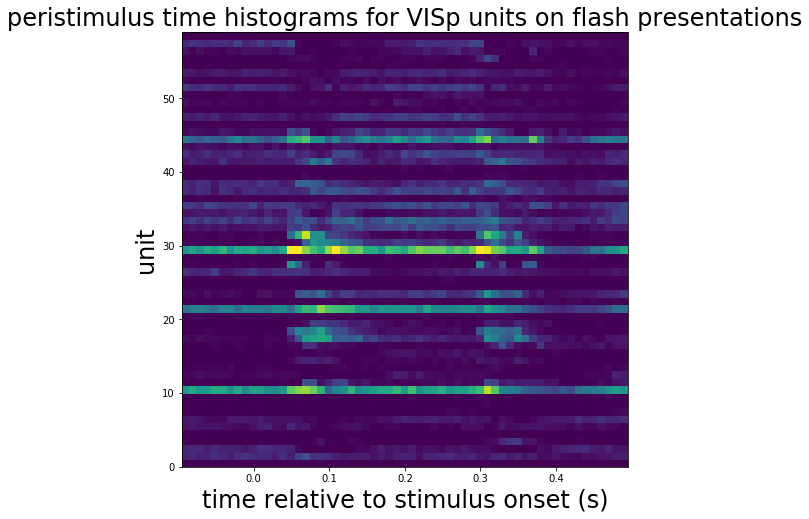

In [10]:
#peristimulus time histograms of VISp
import matplotlib.pyplot as plt
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=24)

plt.show()

In [4]:
# the first session in the VISl list 
session = cache.get_session_data(session_visl_list[0])

In [5]:
#peristimulus time histograms of VISl
presentations = session.get_stimulus_table("flashes")
units = session.units[session.units["ecephys_structure_acronym"] == 'VISl']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords

/opt/conda/lib/python3.6/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:1086: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.095 ... 0.495
  * unit_id                          (unit_id) int64 950939257 ... 950940859

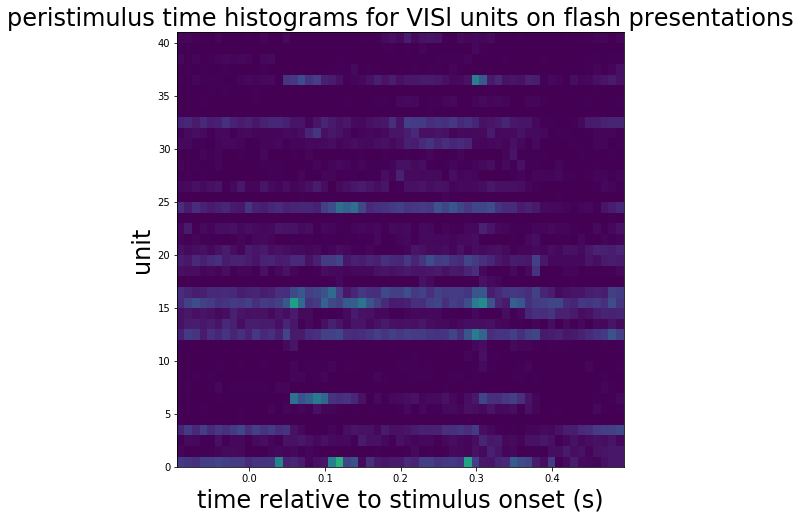

In [7]:
#peristimulus time histograms of VISl
import matplotlib.pyplot as plt
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISl units on flash presentations", fontsize=24)

plt.show()